# 티커 ICLN : RSI 및 볼린저밴드(모멘텀, 평균회귀, 합성전략) 수익률 비교

# RSI : 30이하시 매수, 70 이상시 매도

RSI : 70 이상의 값은 유가증권이 과매수 또는 과대 평가되고 있음을 나타내며 추세 반전 또는 가격 조정에 대비할 수 있다는 것이다. 30 이하의 RSI수치는 과매도 또는 저평가 상태를 나타낸다.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [24]:
# 티커 ICLN 데이터 불러오기
stock = yf.download('ICLN', '2017-01-01', '2022-01-01', adjusted=True)
stock

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,8.00,8.00,7.95,7.97,7.32,70200
2017-01-04,8.00,8.13,8.00,8.11,7.45,38800
2017-01-05,8.10,8.18,8.10,8.16,7.50,43000
2017-01-06,8.18,8.18,8.11,8.12,7.46,30800
2017-01-09,8.16,8.18,8.14,8.15,7.49,36100
...,...,...,...,...,...,...
2021-12-27,21.23,21.33,21.06,21.21,21.20,5830800
2021-12-28,21.13,21.21,20.94,21.00,20.99,7437800
2021-12-29,20.98,21.07,20.75,20.93,20.92,5264100


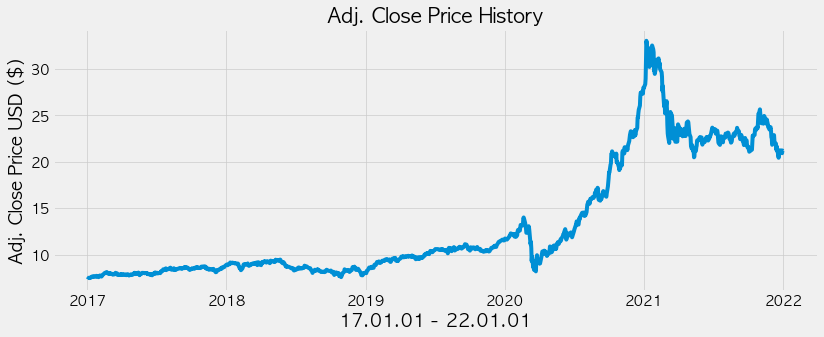

In [25]:
# 그래프
plt.figure(figsize=(12.2, 4.5))
plt.plot(stock.index, stock['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('17.01.01 - 22.01.01', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

In [26]:
# RSI 계산하기
# 전일자와 가격 차이 계산
delta = stock['Adj Close'].diff(1)
delta 

Date
2017-01-03     NaN
2017-01-04    0.13
2017-01-05    0.05
2017-01-06   -0.04
2017-01-09    0.03
              ... 
2021-12-27   -0.03
2021-12-28   -0.21
2021-12-29   -0.07
2021-12-30    0.29
2021-12-31   -0.04
Name: Adj Close, Length: 1259, dtype: float64

In [27]:
# Nan 제거
delta = delta.dropna()
delta

Date
2017-01-04    0.13
2017-01-05    0.05
2017-01-06   -0.04
2017-01-09    0.03
2017-01-10    0.01
              ... 
2021-12-27   -0.03
2021-12-28   -0.21
2021-12-29   -0.07
2021-12-30    0.29
2021-12-31   -0.04
Name: Adj Close, Length: 1258, dtype: float64

In [28]:
# 수익과 손실 구하기
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down >0] = 0

In [29]:
# 평균 수익과 평균 손실 계산
period = 14
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [30]:
# RS(Relative Strength) 계산
RS = AVG_Gain / AVG_Loss
# Relatvie Strength Index(RSI) 계산
RSI = 100.0 - (100.0 / (1.0 + RS))

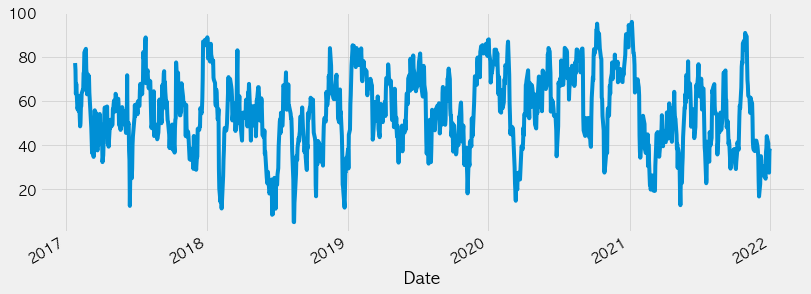

In [31]:
# RSI 보여주기
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [32]:
# 데이터 합치기
new_df = pd.DataFrame()
new_df['Adj Close Price'] = stock['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close Price,RSI
Date,,
2017-01-03,7.32,NaN
2017-01-04,7.45,NaN
2017-01-05,7.50,NaN
2017-01-06,7.46,NaN
2017-01-09,7.49,NaN
...,...,...
2021-12-27,21.20,40.88
2021-12-28,20.99,29.18
2021-12-29,20.92,27.57


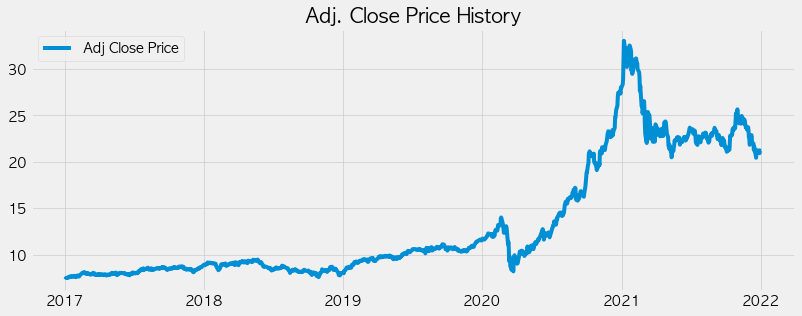

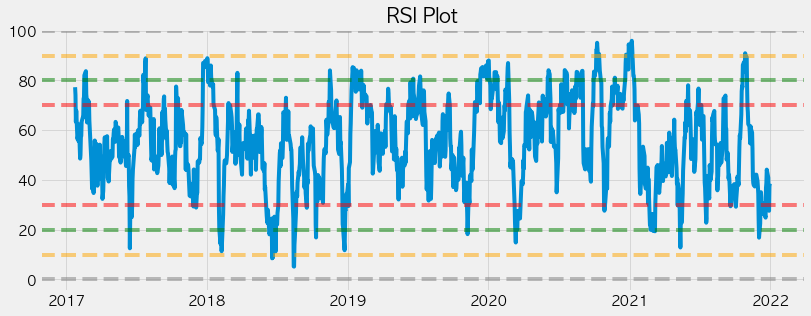

In [33]:
# 종가 및 RSI 그래프
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc='upper left')
plt.show()

plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(10, linestyle='--', alpha=0.5, color='orange')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(80, linestyle='--', alpha=0.5, color='green')
plt.axhline(90, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.show()

In [34]:
new_df[new_df['RSI'] < 30]

,Adj Close Price,RSI
Date,,
2017-06-15,7.81,12.50
2017-06-16,7.85,25.00
2017-06-20,7.76,25.04
2017-06-21,7.81,29.58
2017-11-27,8.33,29.29
...,...,...
2021-12-16,21.17,29.57
2021-12-17,21.21,26.72
2021-12-20,20.43,24.83


In [35]:
new_df[new_df['RSI']>70]

,Adj Close Price,RSI
Date,,
2017-01-24,7.65,77.27
2017-01-25,7.71,74.14
2017-02-15,7.99,72.62
2017-02-16,8.01,73.26
2017-02-17,8.02,82.05
...,...,...
2021-10-27,24.32,85.37
2021-10-28,25.17,90.93
2021-10-29,25.13,90.02


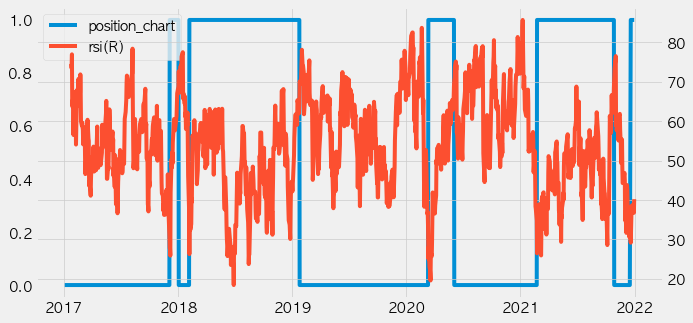

In [36]:
# 백테스팅 진행
import finterstellar as fs
fs.rsi(stock, w=14)
fs.indicator_to_signal(stock, factor='rsi', buy=30, sell=70)
fs.position(stock)
fs.draw_chart(stock, left='position_chart', right='rsi')

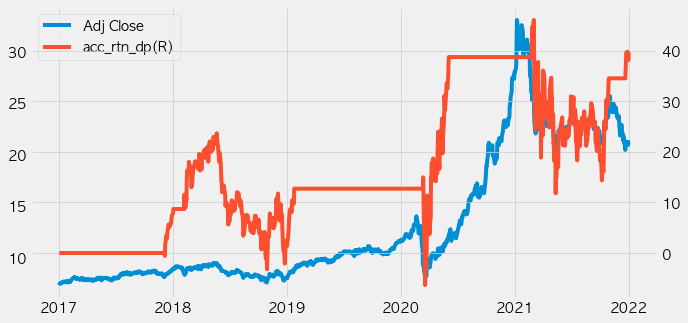

In [37]:
# 증권사 수수료 0.25% 반영
fs.evaluate(stock, cost=.0025)
fs.draw_chart(stock, left='Adj Close', right='acc_rtn_dp')

In [38]:
# 무위험이자율 1% 가정하고 기대수익률 계산
fs.performance(stock, rf_rate=0.01)

CAGR: 7.00%
Accumulated return: 39.66%
Average return: 8.11%
Benchmark return : 154.62%
Number of trades: 5
Number of win: 3
Hit ratio: 60.00%
Investment period: 4.9yrs
Sharpe ratio: 0.28
MDD: -24.26%
Benchmark MDD: -41.44%


CARG : 연평균 수익률
Accumulated Return : 전체기간 동안 누적 수익률
Average Return : 건별 수익률의 평균값
Benchmark Return : 해당 기간 동안 매매를 하지 않고 보유를 했다고 가정할때 수익률
Number of Trades : 해당 기간 동안 발생한 총 매매 횟수
Number of win : 전략이 성공한 횟수
Hit Ratio : 전략이 성공한 비율
Investment Period : 총 투자기간
Sharp Ratio : 샤프비율이며, 위험대비 수익이 얼마인지 표시
Benchmark MDD : 주식을 계속 들고 있었을 경우 최대 손실

RSI : 박스권 횡보를 보이는 종목에 더 적합하다는 평가를 받는 지표

# 볼린저밴드

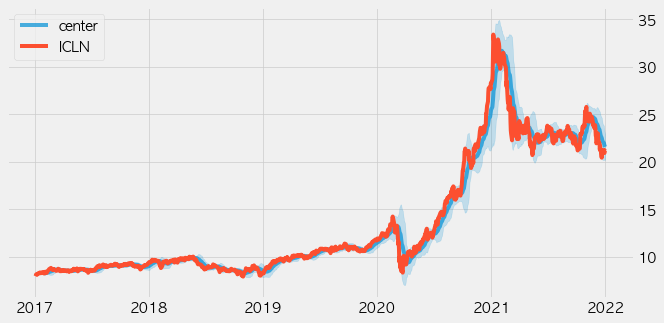

In [39]:
#볼린저밴드 확인
# w는 기간(20일 이동평균 기준), k는 밴드폭(-+2% 밴드)
df=fs.get_price('ICLN', start_date='2017-01-01', end_date='2022-01-01') 
fs.bollinger(df, w=20, k=2) 
fs.draw_band_chart(df)

# 볼린저밴드 모멘텀 전략 

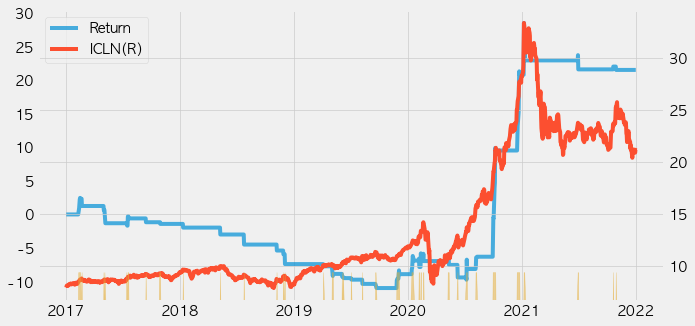

In [40]:
#모멘텀전략(볼린저밴드)
#위쪽 밴드 위 : A, 위쪽밴드-이동평균 선위 : B, 이동평균선 밑-아래쪽 밴드 : C, 아래쪽 밴드 아래 :D
fs.band_to_signal(df, buy='A', sell='B')
#시그널에 따른 포지션 설정
fs.position(df) 
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [41]:
fs.performance(df, rf_rate=0.01)

CAGR: 4.05%
Accumulated return: 21.54%
Average return: 0.60%
Benchmark return : 156.61%
Number of trades: 36
Number of win: 11
Hit ratio: 30.56%
Investment period: 4.9yrs
Sharpe ratio: 0.39
MDD: -13.11%
Benchmark MDD: -41.50%


# 볼린저밴드 평균회귀 전략

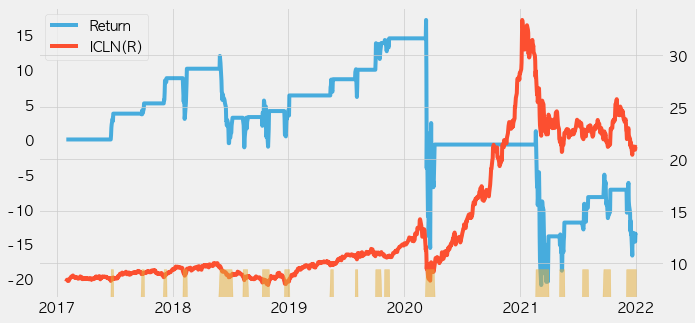

In [42]:
#평균회귀 전략(볼린저밴드)
fs.band_to_signal(df, buy='D', sell='B') 
fs.position(df) 
fs.evaluate(df, cost=.0025) 
fs.draw_trade_results(df)

In [43]:
fs.performance(df, rf_rate=0.01)

CAGR: -2.95%
Accumulated return: -13.69%
Average return: -0.29%
Benchmark return : 156.61%
Number of trades: 18
Number of win: 14
Hit ratio: 77.78%
Investment period: 4.9yrs
Sharpe ratio: -0.18
MDD: -32.48%
Benchmark MDD: -41.50%


# 볼린저밴드 합성전략

CAGR: 0.73%
Accumulated return: 3.59%
Average return: 0.30%
Benchmark return : 145.88%
Number of trades: 52
Number of win: 24
Hit ratio: 46.15%
Investment period: 4.8yrs
Sharpe ratio: -0.01
MDD: -27.94%
Benchmark MDD: -41.50%


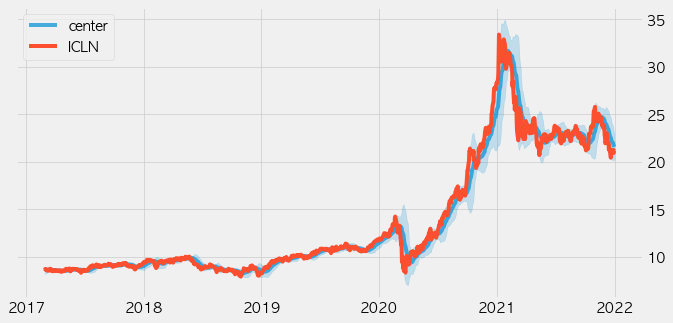

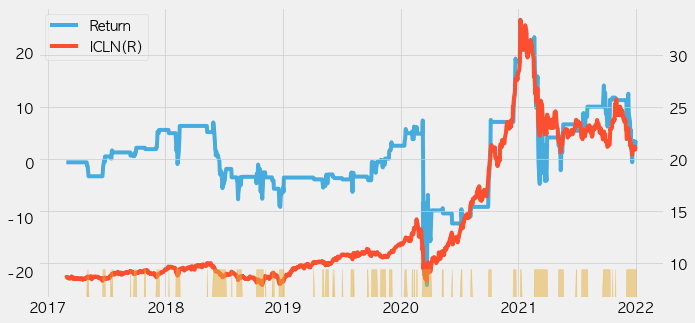

In [44]:
#합성전략(볼린저밴드)
df = fs.bollinger(df, w=20, k=2) 
df['s1'] = fs.band_to_signal(df, buy='A', sell='B') 
df['s2'] = fs.band_to_signal(df, buy='D', sell='B') 
fs.combine_signal_or(df, 's1', 's2') 
fs.position(df) 
fs.evaluate(df, cost=.0025) 
fs.performance(df, rf_rate=.01) 
fs.draw_band_chart(df) 
fs.draw_trade_results(df)

# ICLN 최근 5년 데이터 비교시 기술적분석 : RSI 수익률이 타 전략보다 우위